In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [141]:
batting_df = pd.read_csv('Batting.csv')

In [142]:
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [143]:
#仅保留某一年的数据
def keep_data_in_year(df, year):
    return df[df.yearID == year]

batting_df_2016 = keep_data_in_year(batting_df, 2016)
batting_df_2016.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
101333,abadfe01,2016,1,MIN,AL,39,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
101334,abadfe01,2016,2,BOS,AL,18,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
101335,abreujo02,2016,1,CHA,AL,159,624,67,183,32,...,100.0,0.0,2.0,47,125.0,7.0,15.0,0.0,9.0,21.0
101336,achteaj01,2016,1,LAA,AL,27,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
101337,ackledu01,2016,1,NYA,AL,28,61,6,9,0,...,4.0,0.0,0.0,8,9.0,0.0,0.0,0.0,1.0,0.0


In [144]:
# 查看看哪些字段存在数据缺失的情况
batting_df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1483 entries, 101333 to 102815
Data columns (total 22 columns):
playerID    1483 non-null object
yearID      1483 non-null int64
stint       1483 non-null int64
teamID      1483 non-null object
lgID        1483 non-null object
G           1483 non-null int64
AB          1483 non-null int64
R           1483 non-null int64
H           1483 non-null int64
2B          1483 non-null int64
3B          1483 non-null int64
HR          1483 non-null int64
RBI         1483 non-null float64
SB          1483 non-null float64
CS          1483 non-null float64
BB          1483 non-null int64
SO          1483 non-null float64
IBB         1483 non-null float64
HBP         1483 non-null float64
SH          1483 non-null float64
SF          1483 non-null float64
GIDP        1483 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 266.5+ KB


In [145]:
#定义公用函数

#绘制直方图
def draw_his(df, key_name, x_label, title):
    plt.hist(df[key_name], bins=6)
    plt.xlabel(x_label)
    plt.ylabel('Frequency')
    plt.title(title)

#绘制散点图
def draw_scatter(df, x_axis_key, y_axis_key, title):
    plt.scatter(x = df[x_axis_key], y = df[y_axis_key])
    plt.xlabel(x_axis_key)
    plt.ylabel(y_axis_key)
    plt.title(title)

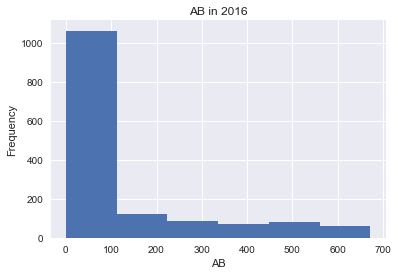

In [146]:
#绘制打点数AB的直方图
draw_his(batting_df_2016, 'AB', 'AB', 'AB in 2016')

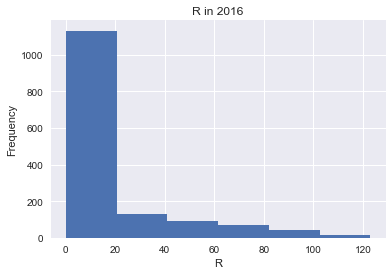

In [147]:
#绘制打点数AB的直方图
draw_his(batting_df_2016, 'R', 'R', 'R in 2016')

In [148]:
#打点数AB统计数据
batting_df_2016['AB'].describe()

count    1483.000000
mean      111.639245
std       177.929105
min         0.000000
25%         0.000000
50%        11.000000
75%       155.000000
max       672.000000
Name: AB, dtype: float64

In [149]:
#得分R统计数据
batting_df_2016['R'].describe()

count    1483.000000
mean       14.662171
std        25.802684
min         0.000000
25%         0.000000
50%         1.000000
75%        18.000000
max       123.000000
Name: R, dtype: float64

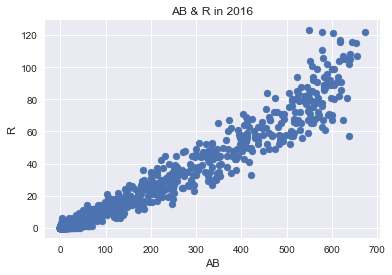

In [150]:
#绘制打点数AB和得分数R的散点图
draw_scatter(batting_df_2016, 'AB', 'R', 'AB & R in 2016')

In [151]:
#计算皮尔逊系数R
np.corrcoef(batting_df_2016['AB'], batting_df_2016['R'])[1, 0]

0.97566869148528623

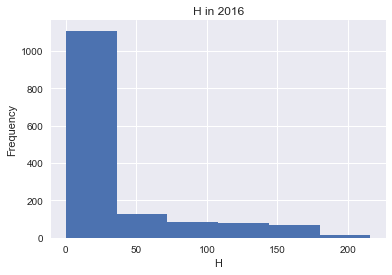

In [152]:
#绘制安打数H的直方图
draw_his(batting_df_2016, 'H', 'H', 'H in 2016')

In [153]:
#安打数H统计数据
batting_df_2016['H'].describe()

count    1483.000000
mean       28.507080
std        48.619753
min         0.000000
25%         0.000000
50%         1.000000
75%        36.000000
max       216.000000
Name: H, dtype: float64

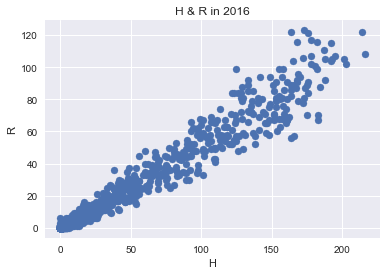

In [154]:
#绘制安打数H和得分数R的散点图
draw_scatter(batting_df_2016, 'H', 'R', 'H & R in 2016')

In [155]:
#计算皮尔逊系数R
np.corrcoef(batting_df_2016['H'], batting_df_2016['R'])[1, 0]

0.98009961650128763

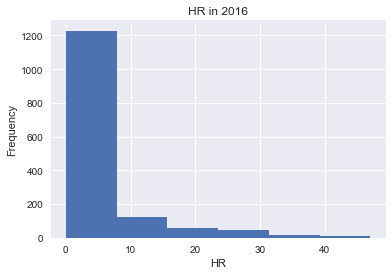

In [156]:
#绘制本垒打数HR的直方图
draw_his(batting_df_2016, 'HR', 'HR', 'HR in 2016')

In [157]:
#本垒打数HR统计数据
batting_df_2016['HR'].describe()

count    1483.000000
mean        3.782873
std         7.863979
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        47.000000
Name: HR, dtype: float64

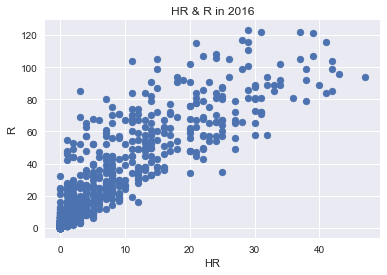

In [158]:
#绘制本垒打数HR和得分数R的散点图
draw_scatter(batting_df_2016, 'HR', 'R', 'HR & R in 2016')

In [159]:
#计算皮尔逊系数R
np.corrcoef(batting_df_2016['HR'], batting_df_2016['R'])[1, 0]

0.90078317451199441